In [19]:
import time; print(time.strftime("The last update of this file: %Y-%m-%d %H:%M:%S", time.gmtime()))
import sys, time
# Establish connection with the UE4 game
from unrealcv import client
client.connect()
if not client.isconnected():
    print('UnrealCV server is not running. Run the game downloaded from http://unrealcv.github.io first.')
    sys.exit(-1)

# Checking status of connection between UnrealCV and UE4 game

res = client.request('vget /unrealcv/status')
# The image resolution and port is configured in the config file.
print('status: ',res)

INFO:__init__:211:Got connection confirm: b'connected to test_game_4_19'


The last update of this file: 2019-06-19 23:33:09
status:  Is Listening
Client Connected
9000
Configuration
Config file: C:/Program Files/Epic Games/UE_4.19/Engine/Binaries/Win64/unrealcv.ini
Port: 9000
Width: 640
Height: 480
FOV: 90.000000
EnableInput: true
EnableRightEye: false



In [20]:
import numpy as np
# SM_DenkMitEdelstahlReinigerSpray_18
# SM_CalgonitFinishKlarspueler_3
# SM_CalgonitFinishVorratspack_12
# SM_DenkMitSpezialsalz_15

# good location 239.593 4.203 174.993
# good rotation -42.805 -178.574 0.000

In [21]:
set_camera_location = client.request('vset /camera/0/location 239.593 4.203 174.993')
set_camera_rotation = client.request('vset /camera/0/rotation -42.805 -178.574 0.000')

In [22]:
actor_array = ['SM_DenkMitEdelstahlReinigerSpray_18','SM_CalgonitFinishKlarspueler_3','SM_CalgonitFinishVorratspack_12']
actor_array = np.array(actor_array)

In [23]:
for i in actor_array:
    print(i)

SM_DenkMitEdelstahlReinigerSpray_18
SM_CalgonitFinishKlarspueler_3
SM_CalgonitFinishVorratspack_12


In [36]:
# set floor color (front floor)

set_floor_mask_color= client.request('vset /object/Floor/color 0 255 0')
for j in actor_array:
    set_mask_color= client.request('vset /object/'+str(j)+'/color 255 0 0')

In [37]:
dirName = 'F:/unreal_cv_documentation/detect_ROI_for_multi_actor/image_test/'
viewmode_1 = 'lit'
viewmode_2 = 'object_mask'
viewmode_3 = 'depth'
image_type = '.png'
depth_type = '.npy'

In [38]:
res_lit = client.request('vget /camera/0/'+str(viewmode_1)+str(" ")+str(dirName)+'lit_1_1'+str(image_type))
res_mask = client.request('vget /camera/0/'+str(viewmode_2)+str(" ")+str(dirName)+'mask_1_1'+str(image_type))
res_depth = client.request('vget /camera/0/'+str(viewmode_3)+str(" ")+str(dirName)+'depth_1_1'+str(depth_type))

In [39]:
print(res_lit)
print(res_mask)
print(res_depth)

F:/unreal_cv_documentation/detect_ROI_for_multi_actor/image_test/lit_1_1.png
F:/unreal_cv_documentation/detect_ROI_for_multi_actor/image_test/mask_1_1.png
F:/unreal_cv_documentation/detect_ROI_for_multi_actor/image_test/depth_1_1.npy


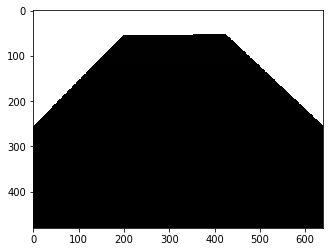

In [40]:
from matplotlib import pyplot as plt
depth = np.load(res_depth)
plt.imshow(depth, cmap='gray')
plt.show()

In [23]:
import numpy as np
import cv2
import os

lit = 'F:/unreal_cv_documentation/detect_ROI_for_multi_actor/image_test/lit_1_1.png'
mask = 'F:/unreal_cv_documentation/detect_ROI_for_multi_actor/image_test/mask_1_1.png'

In [24]:
import cv2

lit_image = cv2.imread(lit)
mask_image = cv2.imread(mask)
cv2.imshow('mask_image', mask_image)

# mask_inv = ~mask_image
# cv2.imshow('mask_inv',mask_inv)

# img_not = cv2.bitwise_not(mask_image)
# cv2.imshow("Invert1",img_not)

imgray=cv2.cvtColor(mask_image,cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray', imgray)
ret,thresh = cv2.threshold(imgray,127,255,1)
cv2.imshow('thresh',thresh)
# cv2.imwrite('F:/unreal_cv_documentation/detect_ROI_for_multi_actor/image_test/threshold.png', thresh)
# thresh_inv = ~thresh
image, contours, hierarchy =  cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# thresh_inv, contours, hierarchy =  cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.imshow('image',image)
# cv2.imwrite('F:/unreal_cv_documentation/detect_ROI_for_multi_actor/image_test/my_image.png',image)

# hsv = cv2.cvtColor(mask_image, cv2.COLOR_BGR2HSV)
# hsv_channels = cv2.split(hsv)
# _,thresh=cv2.threshold(hsv_channels[0],127,255,0)
# im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cv2.imshow('im2',im2)
for t in range (0,3,1):
    if len(contours)>0:
        print('length is: ',len(contours))
        cnt = contours[0]
        x,y,w,h = cv2.boundingRect(cnt)
    
        draw_rec_lit_image=cv2.rectangle(lit_image,(x,y),(x+w,y+h),(0,0,255),2)
#         cv2.imwrite('F:/unreal_cv_documentation/detect_ROI_for_multi_actor/image_test/detect_roi_lit.png',draw_rec_lit_image)
        cv2.imshow('lit_ROI', draw_rec_lit_image)
#         crop_img = draw_rec_lit_image[y:y+h, x:x+w]
#         cv2.imshow('ROI', crop_img)



if cv2.waitKey() == ord('q'): #press q to close the output image window
        cv2.destroyAllWindows()

length is:  4
length is:  4
length is:  4


In [26]:
img = cv2.imread(mask)
rgb_img = cv2.imread(lit)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## Gen lower mask (0-5) and upper mask (175-180) of RED
mask1 = cv2.inRange(img_hsv, (0,50,20), (5,255,255))
mask2 = cv2.inRange(img_hsv, (175,50,20), (180,255,255))

## Merge the mask and crop the red regions
mask = cv2.bitwise_or(mask1, mask2 )
croped = cv2.bitwise_and(img, img, mask=mask)
test_rgb = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)

image, contours, hierarchy =  cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.imshow('image', image)
## Display
cv2.imshow("mask", mask)
cv2.imshow("croped", croped)
cv2.imshow("test_rgb", test_rgb)

if cv2.waitKey() == ord('q'): #press q to close the output image window
        cv2.destroyAllWindows()

TypeError: bad argument type for built-in operation